In [120]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score

sns.set_style('darkgrid')

In [96]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [97]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [98]:
# usuwanie niepotrzenym kolumn

df = df.drop(['Unnamed: 0', 'id'], axis =1)

In [99]:
# szukanie klastrów wśród pasażerów nieusatysfakcjonowanych lotem - przygotowanie ramki danych

data = df.loc[df['satisfaction'] != 'satisfied']
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


In [100]:
# sprawdzanie typów danych, brakujących wartości

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58879 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             58879 non-null  object 
 1   Customer Type                      58879 non-null  object 
 2   Age                                58879 non-null  int64  
 3   Type of Travel                     58879 non-null  object 
 4   Class                              58879 non-null  object 
 5   Flight Distance                    58879 non-null  int64  
 6   Inflight wifi service              58879 non-null  int64  
 7   Departure/Arrival time convenient  58879 non-null  int64  
 8   Ease of Online booking             58879 non-null  int64  
 9   Gate location                      58879 non-null  int64  
 10  Food and drink                     58879 non-null  int64  
 11  Online boarding                    58879 non-null  in

In [101]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             182
satisfaction                           0
dtype: int64

In [102]:
# usuwanie kolumny arrival delay in minutes silnie skorelowanej z departure delay, w której nie ma Nan

data = data.drop(['Arrival Delay in Minutes'], axis =1)
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [103]:
# dalsze przygotowanie danych - usunięcie kolumny satysfakcja, która zawiera teraz jedną wartość
# one hot encoding zmiennych, podział na zmienne kategoryczne i numeryczne

data = data.drop(['satisfaction'], axis =1)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,25
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,11
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,2,1,1,3,4,4,4,4,1,0
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,2,2,3,3,4,3,5,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,4,...,3,2,2,4,3,4,2,4,2,0
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,2,3,1,4,2,3,2,3
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,1,5,4,3,2,4,5,5,4,7
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,1,4,5,1,5,4,1,0


In [104]:
num_columns = ["Age" , "Flight Distance" ,"Departure Delay in Minutes"]
cat_columns = list(set(data.columns).difference(num_columns))
print(cat_columns)

['Online boarding', 'Cleanliness', 'Baggage handling', 'Food and drink', 'Checkin service', 'Gender', 'Inflight service', 'Departure/Arrival time convenient', 'Leg room service', 'Ease of Online booking', 'Type of Travel', 'On-board service', 'Inflight entertainment', 'Seat comfort', 'Customer Type', 'Gate location', 'Class', 'Inflight wifi service']


In [118]:
cat_df = pd.get_dummies(data[cat_columns], prefix=cat_columns, columns=cat_columns)
cat_df

,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,...,Gate location_5,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
103899,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
103901,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
103902,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0


In [121]:
scaler = MinMaxScaler()
num_df = pd.DataFrame(scaler.fit_transform(df[num_columns]), columns=num_columns)
num_df

,Age,Flight Distance,Departure Delay in Minutes
0,0.076923,0.086632,0.015704
1,0.230769,0.041195,0.000628
2,0.243590,0.224354,0.000000
3,0.230769,0.107229,0.006910
4,0.692308,0.036955,0.000000
...,...,...,...
103899,0.205128,0.032512,0.001884
103900,0.538462,0.467690,0.000000
103901,0.294872,0.396607,0.004397
103902,0.192308,0.195679,0.000000


In [122]:
# łączenie przekształconych zmiennych w jedną ramkę danych

data_scaled = cat_df.join(num_df)
data_scaled

,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,...,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0.076923,0.086632,0.015704
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.230769,0.041195,0.000628
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.230769,0.107229,0.006910
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.243590,0.232027,0.000000
6,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.512821,0.251414,0.005653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0.551282,0.320880,0.000000
103899,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.205128,0.032512,0.001884
103901,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.294872,0.396607,0.004397
103902,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0.192308,0.195679,0.000000


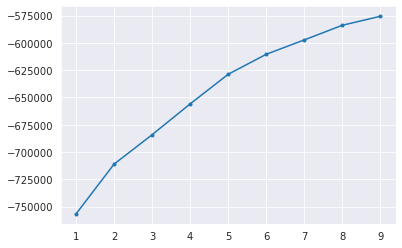

In [126]:
# znajdowanie odpowiedniej ilości k metodą łokcia 
scores = [KMeans(k).fit(data_scaled).score(data_scaled) for k in range(1, 10)]
plt.plot(range(1, 10), scores, markersize=3, marker="o")
plt.show()

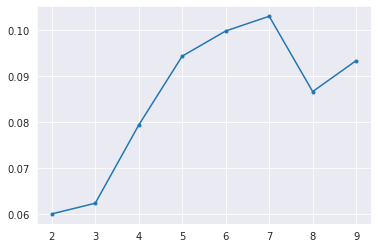

In [127]:
# znajdowanie odpowiedniej ilości k metodą silhouette_score (k=6 lub 7 byłoby faworytem, ale wynik i tak słaby)

scores = []

for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(data_scaled)
    scores.append(silhouette_score(data_scaled, kmeans.labels_))
    
plt.plot(range(2, 10), scores, markersize=3, marker="o")
plt.show()

Biorąc pod uwagę wyniki, szukanie klastrów wśród osób nieusatysfakcjonowanych przy użyciu wszystkich zmiennych byłoby trochę na siłę.